Show the following things. 

A map of movement (Folium)
Distance graph (increasing from zero)
Velocity graph (calculated from coordinates)
Acceleration graph (observed [three components] and calculated from speed [one component]).
Note that these will be very different from each other!
Average speed as a number
Traveled distance as a number
The number of steps 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import folium

In [29]:

# Read the data
data = pd.read_csv("GPS_data.csv")  

# Create a map centered around the first coordinates
map = folium.Map(location=[data['latitude'].iloc[0], data['longitude'].iloc[0]], zoom_start=16)

# Add markers for each data point
#for index, row in data.iterrows():
#    folium.Marker([row['latitude'], row['longitude']], popup=f"Time: {row['seconds_elapsed']}").add_to(map)

# Draw lines connecting consecutive points
folium.PolyLine(locations=data[['latitude', 'longitude']].values, color='blue').add_to(map)

# Save the map as an HTML file
map.save("movement_map.html")
map


In [33]:


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


Final calculated distance: 0.21870509689541065 kilometers


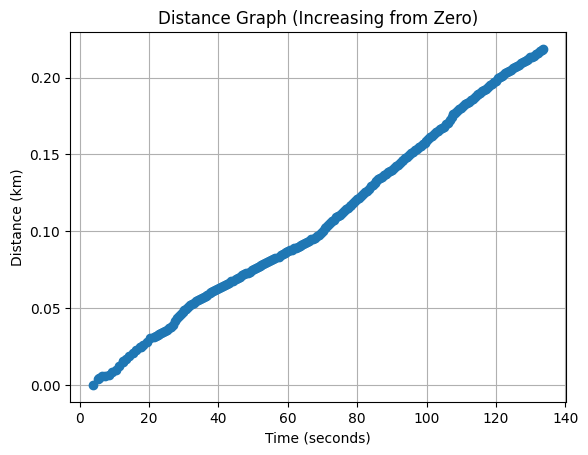

In [39]:
# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees). 
    """
    # Convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    r = 6371
    km = r * c
    return km


# Initialize the distances list with the starting distance (zero)
distances = [0]

# Calculate distances based on latitude and longitude
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    # Accumulate distances to create a cumulative distance graph
    distances.append(distances[-1] + distance)

# Print the final calculated distance
print(f"Final calculated distance: {distances[-1]} kilometers")

# Plot the distance graph
plt.plot(df['seconds_elapsed'], distances, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (km)')
plt.title('Distance Graph (Increasing from Zero)')

# Show the plot
plt.grid(True)
plt.show()

